## STEP 01: Load Data

In this step, we bring our sales data into Python so we can analyze it.

---

### 1️⃣ Import Required Libraries

```python
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\data\raw_sales.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## STEP 02: Rename Columns & Validate Data

In this step, we **clean and standardize column names** and make sure all required data is present before analysis.

---

### 1️⃣ Rename Column Names

```python
df = df.rename(columns={
    "Product Category": "Category",
    "Price per Unit": "Price",
    "Total Amount": "Revenue"
})


In [3]:
df = df.rename(columns={
    "Product Category": "Category",
    "Price per Unit": "Price",
    "Total Amount": "Revenue"
})
required_cols = ["Date", "Category", "Quantity", "Price", "Revenue"]
missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Category,Quantity,Price,Revenue
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## STEP 03: Clean the Sales Data

This step fixes wrong data, removes empty or duplicate rows, and saves a clean file
that can be safely used for analysis and charts.

---

### 1️⃣ Create a Safe Copy of the Data

```python
clean_df = df.copy()


In [4]:
clean_df = df.copy()
clean_df["Date"] = pd.to_datetime(clean_df["Date"], errors="coerce")
clean_df = clean_df.dropna(subset=["Date", "Category"])
for col in ["Quantity", "Price", "Revenue"]:
    clean_df[col] = pd.to_numeric(clean_df[col], errors="coerce")
clean_df = clean_df.dropna(subset=["Quantity", "Price", "Revenue"])
clean_df = clean_df.drop_duplicates()
clean_df.to_csv(
    r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\data\cleaned_sales.csv",
    index=False)
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  1000 non-null   int64         
 1   Date            1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   object        
 3   Gender          1000 non-null   object        
 4   Age             1000 non-null   int64         
 5   Category        1000 non-null   object        
 6   Quantity        1000 non-null   int64         
 7   Price           1000 non-null   int64         
 8   Revenue         1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


## STEP 04: Create New Useful Columns (Feature Engineering)

In this step, we **add new columns** that make sales analysis easier and more meaningful.

---

### 1️⃣ Create a Safe Copy of Clean Data

```python
feat_df = clean_df.copy()


In [5]:
feat_df = clean_df.copy()
feat_df["Revenue"] = feat_df["Quantity"] * feat_df["Price"]
feat_df["Month"] = feat_df["Date"].dt.to_period("M")
feat_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Category,Quantity,Price,Revenue,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


## STEP 05: Calculate Key Performance Indicators (KPIs)

In this step, we calculate **important business numbers** that summarize how the sales are performing.

---

### 1️⃣ Calculate Total Revenue

```python
total_revenue = feat_df["Revenue"].sum()


In [6]:
total_revenue = feat_df["Revenue"].sum()
total_orders = len(feat_df)
avg_order_value = total_revenue / total_orders
kpi_df = pd.DataFrame({
    "Metric": ["Total Revenue", "Total Orders", "Average Order Value"],
    "Value": [total_revenue, total_orders, round(avg_order_value, 2)]
})
kpi_df


,Metric,Value
0,Total Revenue,456000.0
1,Total Orders,1000.0
2,Average Order Value,456.0


## STEP 06: Group and Summarize the Data (Aggregation)

In this step, we **combine rows together** to see:
- Revenue **month by month**
- Revenue **category by category**

This helps us understand **patterns and performance**.

---

## 📅 Monthly Revenue

```python
monthly_revenue = (
    feat_df.groupby("Month")["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Month")
)


In [7]:
monthly_revenue = (
    feat_df.groupby("Month")["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Month")
)
category_revenue = (
    feat_df.groupby("Category")["Revenue"]
    .sum()
    .reset_index()
    .sort_values("Revenue", ascending=False)
)
monthly_revenue, category_revenue


(      Month  Revenue
 0   2023-01    35450
 1   2023-02    44060
 2   2023-03    28990
 3   2023-04    33870
 4   2023-05    53150
 5   2023-06    36715
 6   2023-07    35465
 7   2023-08    36960
 8   2023-09    23620
 9   2023-10    46580
 10  2023-11    34920
 11  2023-12    44690
 12  2024-01     1530,
       Category  Revenue
 2  Electronics   156905
 1     Clothing   155580
 0       Beauty   143515)

## STEP 07: Visualize the Sales Data (Charts & Graphs)

In this step, we **turn numbers into pictures** so anyone can easily understand sales performance.

---

### 🔹 Import Chart Library

```python
import matplotlib.pyplot as plt


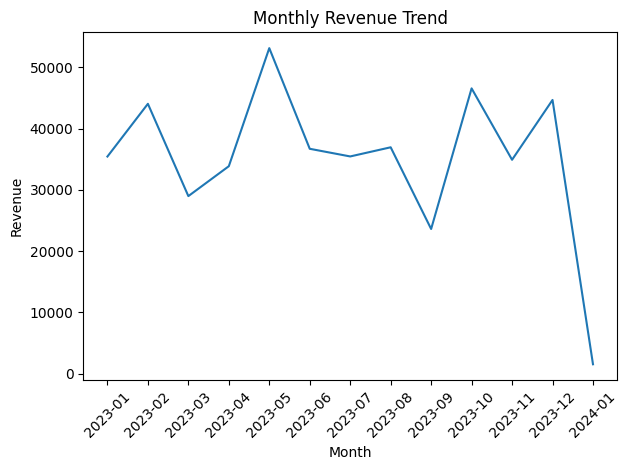

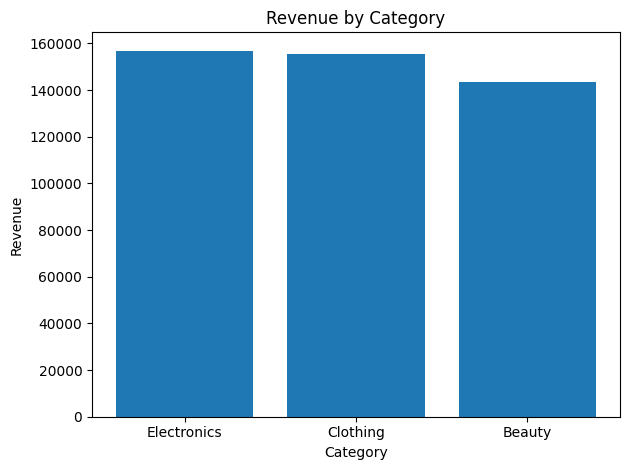

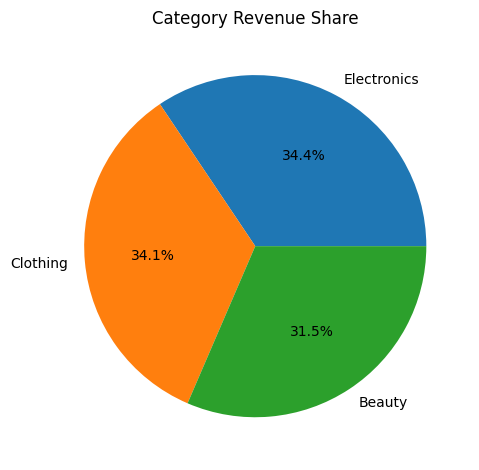

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(monthly_revenue["Month"].astype(str), monthly_revenue["Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure()
plt.bar(category_revenue["Category"], category_revenue["Revenue"])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
plt.figure()
plt.pie(
    category_revenue["Revenue"],
    labels=category_revenue["Category"],
    autopct="%1.1f%%"
)
plt.title("Category Revenue Share")
plt.tight_layout()
plt.show()


## STEP 08: Save Charts and Export KPIs

In this step, we **save charts as image files** and **export key numbers (KPIs) to Excel** so they can be shared easily.

---

## 📈 Save Monthly Revenue Line Chart

```python
plt.figure()


In [ ]:

plt.figure()
plt.plot(monthly_revenue["Month"].astype(str), monthly_revenue["Revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\outputs\charts\monthly_revenue.png")
plt.close()
plt.figure()
plt.bar(category_revenue["Category"], category_revenue["Revenue"])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig(r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\outputs\charts\category_revenue_bar.png")
plt.close()
plt.figure()
plt.pie(
    category_revenue["Revenue"],
    labels=category_revenue["Category"],
    autopct="%1.1f%%"
)
plt.title("Category Revenue Share")
plt.tight_layout()
plt.savefig(r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\outputs\charts\category_revenue_pie.png")
plt.close()
kpi_df.to_excel(r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\outputs\kpis.xlsx", index=False) 
print("Step 08 completed: charts + KPIs exported.")


Step 08 completed: charts + KPIs exported.


## TOP 3 vs BOTTOM 3 MONTHS – Revenue Comparison

In this step, we **compare the worst-performing months with the best-performing months**
to understand **how much sales increase during peak periods**.

---

### 1️⃣ Sort Months by Revenue

```python
sorted_months = monthly_revenue.sort_values("Revenue")


In [ ]:
sorted_months = monthly_revenue.sort_values("Revenue")
bottom_3 = sorted_months.head(3)
top_3 = sorted_months.tail(3)
bottom_avg = bottom_3["Revenue"].mean()
top_avg = top_3["Revenue"].mean()
percent_change = ((top_avg - bottom_avg) / bottom_avg) * 100
comparison_df = pd.DataFrame({
    "Metric": ["Bottom 3 Months Avg Revenue", "Top 3 Months Avg Revenue", "Growth %"],
    "Value": [round(bottom_avg, 2), round(top_avg, 2), f"{round(percent_change, 2)}%"]
})
comparison_df


,Metric,Value
0,Bottom 3 Months Avg Revenue,18046.67
1,Top 3 Months Avg Revenue,48140.0
2,Growth %,166.75%


## STEP 09: Create a Business Insights PDF Report

In this step, we **write business insights in plain English** and **save them as a PDF report** that can be shared with managers or clients.

---

### 1️⃣ Import Tools to Create a PDF

```python
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4


In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
insight_1 = (
    "Seasonality Impact: Top 3 months generate 166.75% higher revenue than bottom 3 months. "
    "Action: Shift promotions and inventory planning 30–45 days before peak months to maximize ROI."
)
insight_2 = (
    "Revenue Driver: Electronics is the highest revenue category, while Beauty underperforms. "
    "Action: Prioritize Electronics for ads and inventory; use discounts or bundles to lift Beauty sales."
)
insight_3 = (
    "Cost Optimization: Reduce inventory holding during low-demand months and reallocate capital "
    "to fast-moving products before peak periods. Action: This lowers storage cost and improves cash flow."
)
file_path = r"C:\Users\mahes\OneDrive\Desktop\sales_summary_dashboard\reports\sales_insights.pdf"
doc = SimpleDocTemplate(file_path, pagesize=A4)
styles = getSampleStyleSheet()
story = [
    Paragraph("<b>3-Day Sales Insight Report for Small Businesses</b>", styles["Title"]),
    Paragraph(insight_1, styles["Normal"]),
    Paragraph("<br/>", styles["Normal"]),
    Paragraph(insight_2, styles["Normal"]),
    Paragraph("<br/>", styles["Normal"]),
    Paragraph(insight_3, styles["Normal"]),
]
doc.build(story)
print("Updated report created: reports/sales_insights.pdf")


Updated report created: reports/sales_insights.pdf
